In [ ]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import os
os.getcwd()
os.chdir("C:\\Users\\Manju\\AdvancdedDeepLearningAndCV\\Training\\DAY 7_10_APR_2022\\To Be Shared")

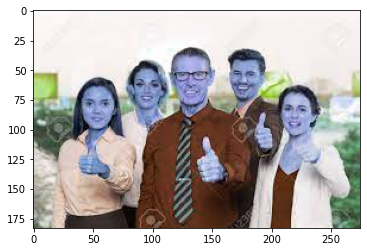

In [ ]:
img=cv2.imread('People5.jpg')
plt.imshow(img)
plt.show()

In [ ]:
net=cv2.dnn.readNet("yolov3.weights","yolov3.cfg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
layer_names=net.getLayerNames() # These are the names on the YOLO architecture for the layers similar to CNN layers

In [ ]:
layer_names

In [ ]:
outputlayers = [layer_names[int(i) - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
outputlayers

['yolo_82', 'yolo_94', 'yolo_106']

In [ ]:
classes=['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus',
         'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
         'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
         'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
         'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
         'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
         'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant',
         'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard',
         'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
         'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
colors= np.random.uniform(0,255,size=(len(classes),3))

len(classes)

80

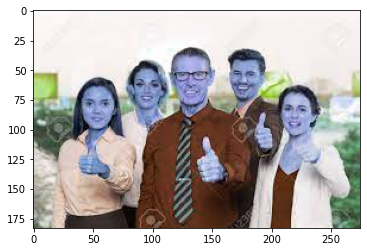

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN # Font we are using for writing on the image
starting_time= time.time() # Time for preocessing - NOT REQUIRED
frame_id = 0

frame= cv2.imread('People5.jpg') #
height,width,channels = frame.shape

# Detecting Objects

blob = cv2.dnn.blobFromImage(frame,0.00392,(320,320),(0,0,0),True,crop=False) #reduce 416 to 320

net.setInput(blob)
outs = net.forward(outputlayers)

class_ids=[]
confidences=[]
boxes=[]

for out in outs:
    for detection in out:
        #print(detection)
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)

            x=int(center_x - w/2)
            y=int(center_y - h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence= confidences[i]
        color = colors[class_ids[i]]
        cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
        cv2.putText(frame,label+" "+str(round(confidence,2)),(x,y+30),font,1,(255,255,255),2)

from matplotlib import pyplot as plt
cv2.imwrite("Image.png",frame)

dt=cv2.imread("Image.png")
plt.imshow(dt)
plt.show()
